In [1]:
!pip install split_folders

In [2]:
import split_folders
from fastai import *
from fastai.imports import *
from fastai.vision import *
import numpy as np
import pandas as pd

In [6]:
imagenet_stats

([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

In [43]:
np.random.seed(2421)
path = 'output/'
data = ImageDataBunch.from_folder(path,size = 224,bs = 64,ds_tfms = get_transforms()).normalize(imagenet_stats)

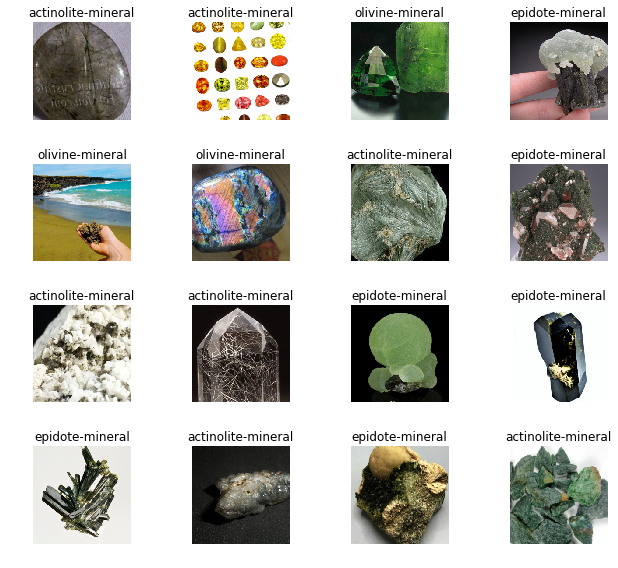

In [39]:
data.c
data.classes
data.show_batch(rows = 4,figsize = (9,8))

In [44]:
learn = cnn_learner(data,models.resnet50,metrics = error_rate)

/usr/local/lib/python3.6/dist-packages/torch/hub.py:411: UserWarning: TORCH_MODEL_ZOO is deprecated, please use env TORCH_HOME instead
  warnings.warn('TORCH_MODEL_ZOO is deprecated, please use env TORCH_HOME instead')


In [45]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.203490,0.684869,0.296296,00:40
1,0.942954,0.637928,0.274074,00:38
2,0.753985,0.677766,0.244444,00:38
3,0.648750,0.656926,0.251852,00:36


In [17]:
learn.fit_one_cycle(2)
#learn.save('model_accurate_')

epoch,train_loss,valid_loss,error_rate,time
0,0.460918,0.698682,0.253165,00:36
1,0.397003,0.660620,0.246835,00:37


In [46]:
learn.save('mode_77%accurate')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


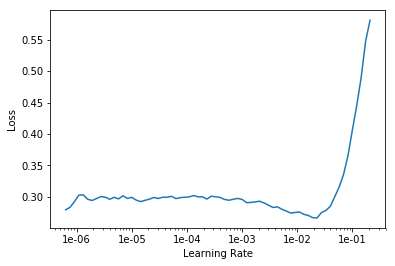

In [19]:
learn.lr_find()
learn.recorder.plot()

In [50]:
#learn.load('mode_77%accurate')
#learn.unfreeze()
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.115366,0.988593,0.207407,00:38
1,0.137871,0.814294,0.222222,00:39


(Category olivine-mineral, tensor(2), tensor([0.0478, 0.3567, 0.5955]))

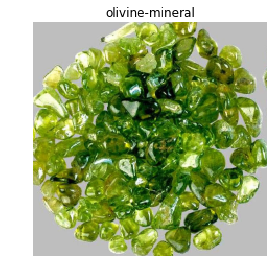

In [26]:
learn.predict(data.show_batch(rows = 1))

(Category olivine-mineral, tensor(2), tensor([0.0478, 0.3567, 0.5955]))

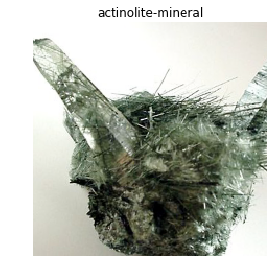

In [27]:
learn.predict(data.show_batch(rows = 1))

In [30]:
from fastai.widgets import *

In [31]:
learn.save('resnet50_defaults_83%')

In [51]:
interp = ClassificationInterpretation.from_learner(learn)

In [52]:
interp.most_confused(min_val=2)

[('actinolite-mineral', 'epidote-mineral', 8),
 ('epidote-mineral', 'olivine-mineral', 8),
 ('epidote-mineral', 'actinolite-mineral', 5),
 ('actinolite-mineral', 'olivine-mineral', 4),
 ('olivine-mineral', 'actinolite-mineral', 3),
 ('olivine-mineral', 'epidote-mineral', 2)]

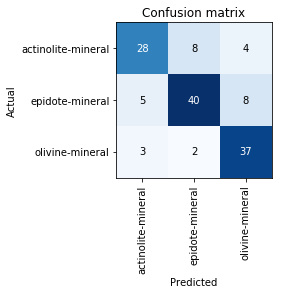

In [53]:
interp.plot_confusion_matrix()

In [35]:
losses,idxs = interp.top_losses()
top_losses_paths = data.valid_ds.x[idxs]

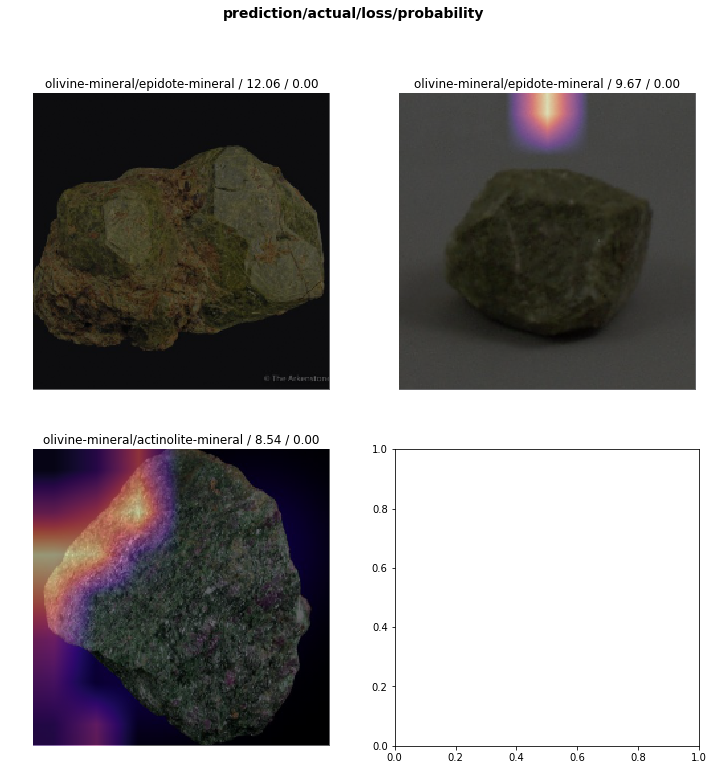

In [55]:
interp.plot_top_losses(3)

In [ ]:
fd = FileDeleter(file_paths = top_losses_paths)

In [48]:
'string'

'string'